In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [3]:
diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled_array = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=diabetes_data.feature_names)
X_test_scaled_array = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=diabetes_data.feature_names)

In [6]:
# Menggunakan Model KNN Regressor
xgb = XGBRegressor()

# Proses Training
xgb.fit(X_train_scaled, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [7]:
# Prediksi
y_pred = xgb.predict(X_test_scaled)

In [8]:
# Membandingkan Hasil Prediksi dengan Nilai Target (y_test)

# Tujuan:
#   - Untuk melihat apakah model KNN Regressor memprediksi label yang benar.
#   - Kita membuat DataFrame berisi dua kolom:
#       y_test  -> label asli (ground truth)
#       y_pred  -> label hasil prediksi model
#
# Ketika nilai y_test dan y_pred sama → prediksi benar.
# Ketika berbeda → prediksi salah.

comparison = pd.DataFrame({
    "y_test": y_test,   # nilai target asli dari data test
    "y_pred": y_pred    # hasil prediksi oleh model KNN
})

# Menampilkan 10 baris pertama agar mudah melihat pola hasil prediksi
comparison.head(10)

,y_test,y_pred
0,219.0,183.559952
1,70.0,196.344925
2,202.0,140.238647
3,230.0,251.643799
4,111.0,155.959778
5,84.0,116.029999
6,242.0,232.688309
7,272.0,230.659195
8,94.0,160.930664
9,96.0,155.445312


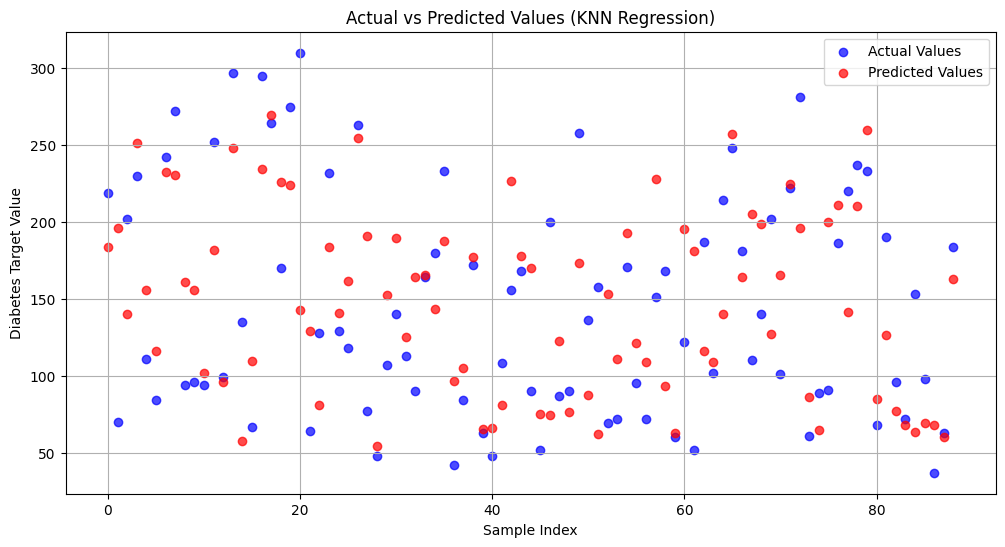

In [9]:
# Visualisasi

index = np.arange(len(y_test))  # index dari 0 sampai jumlah sample

plt.figure(figsize=(12,6))

plt.scatter(index, y_test, color="blue", label="Actual Values", alpha=0.7)
plt.scatter(index, y_pred, color="red", label="Predicted Values", alpha=0.7)

plt.xlabel("Sample Index")
plt.ylabel("Diabetes Target Value")
plt.title("Actual vs Predicted Values (KNN Regression)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R2 Score: 0.3675149756138415
MSE: 3351.001637862091
RMSE: 57.88783670048563
MAE: 46.38896564955122


In [12]:
# Prediksi untuk satu sample baru 
sample = [
    0.03,  # age
    -0.02, # sex
    0.04,  # bmi
    0.03,  # bp
    -0.01, # s1
    -0.03, # s2
    -0.04, # s3
    0.02,  # s4
    0.01,  # s5
    -0.02  # s6
]
formatted_sample = pd.DataFrame([sample], columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
single_prediction = xgb.predict(formatted_sample)

print("Input Sample:", sample)
print("Hasil Prediksi:", single_prediction)

Input Sample: [0.03, -0.02, 0.04, 0.03, -0.01, -0.03, -0.04, 0.02, 0.01, -0.02]
Hasil Prediksi: [112.47665]
